In [267]:
!python --version

Python 3.11.7


In [268]:
!python -m pip install pandas numpy matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# week 1
# practice quiz
df = pd.read_csv("./week1-practice-dataset.csv")
df.describe()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,1000.500000,10.500000,1.841545,0.499100,42.251409,27096.126112,2.996000
std,577.357414,5.766353,1.025911,0.702041,13.766646,15928.188291,1.409622
min,1.000000,1.000000,0.000000,0.000000,18.007529,609.107170,1.000000
25%,500.750000,5.750000,1.108936,0.000000,30.505706,15379.591862,2.000000
50%,1000.500000,10.500000,1.811417,0.000000,42.436092,24487.068020,3.000000
75%,1500.250000,15.250000,2.534365,1.000000,54.362395,35272.533787,4.000000
max,2000.000000,20.000000,6.592769,5.000000,64.984126,141066.966883,5.000000


In [5]:
df

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
0,1,1,0.939444,1,61.710758,25186.798772,3
1,1,2,2.560969,2,61.710758,25186.798772,3
2,1,3,0.901123,0,61.710758,25186.798772,3
3,1,4,1.916530,1,61.710758,25186.798772,3
4,1,5,1.548751,0,61.710758,25186.798772,3
...,...,...,...,...,...,...,...
39995,2000,16,0.750441,1,44.996287,23161.628046,3
39996,2000,17,2.173094,0,44.996287,23161.628046,3
39997,2000,18,1.195418,0,44.996287,23161.628046,3
39998,2000,19,2.349278,1,44.996287,23161.628046,3


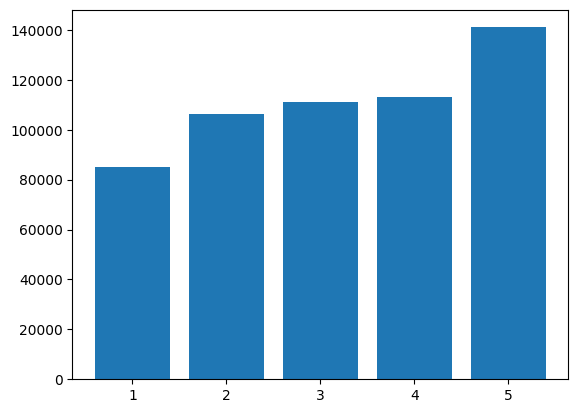

In [209]:
fig, ax = plt.subplots()
ax.bar("AREA", "INCOME", data=df, linewidth=0.5)
plt.show()

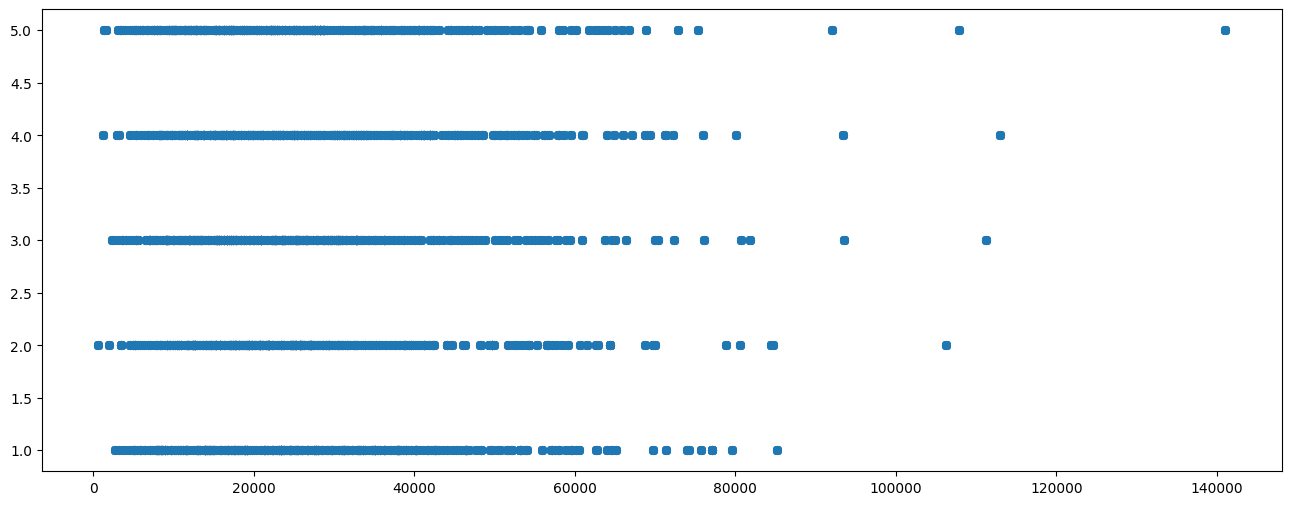

In [6]:
fig, ax = plt.subplots(figsize = (16, 6))
ax.scatter("INCOME", "AREA", data=df, linewidth=0.5)
plt.show()

In [18]:
df.groupby("HHID")["PASTA"].sum().max()

55.36193058243067

In [207]:
area_4 = df[df["AREA"] == 4]

area_4.describe()

,HHID,TIME,PASTA,EXPOS,AGE,INCOME,AREA
count,8060.000000,8060.000000,8060.000000,8060.000000,8060.000000,8060.000000,8060.0
mean,1068.101737,10.500000,1.841477,0.496402,42.217914,29260.133137,4.0
std,554.521974,5.766639,1.027233,0.692872,13.645456,16280.430895,0.0
min,3.000000,1.000000,0.000000,0.000000,18.127332,1241.960729,4.0
25%,614.000000,5.750000,1.104326,0.000000,30.802340,16501.072967,4.0
50%,1100.000000,10.500000,1.816470,0.000000,42.396097,26499.489701,4.0
75%,1547.000000,15.250000,2.532061,1.000000,53.931768,39052.695544,4.0
max,1997.000000,20.000000,6.592769,4.000000,64.880865,112983.969631,4.0


In [52]:
more_than_20k_in_area_2 = df[(df["AREA"] == 2) & (df["INCOME"] > 20000.0)]

more_than_30_units_pasta = list(more_than_20k_in_area_2.groupby("HHID")["PASTA"].sum())

len([x for x in more_than_30_units_pasta if x > 30])

218

In [7]:
df["PASTA"].corr(df["EXPOS"])

0.3266173773186488

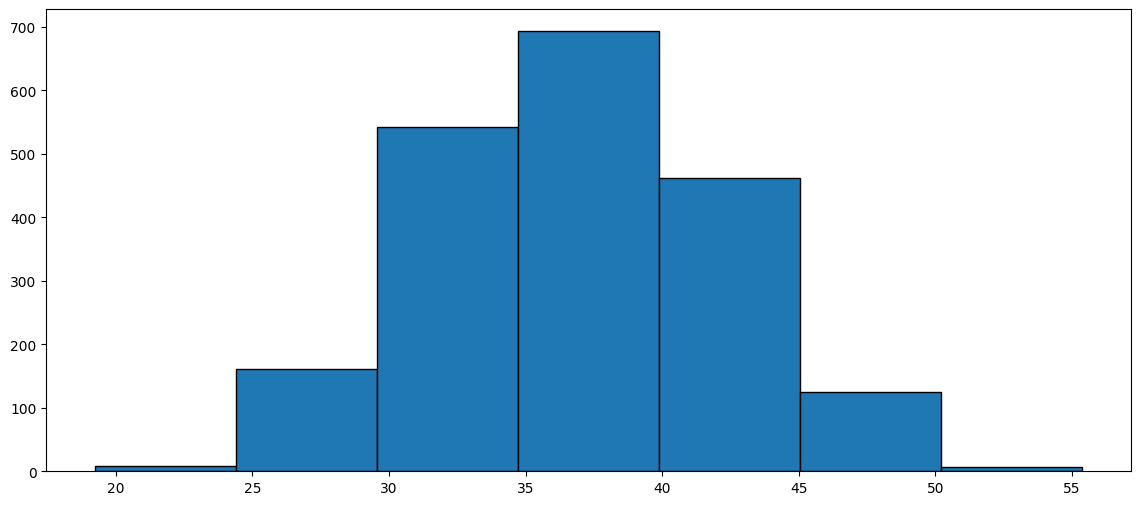

count    2000.000000
mean       36.830891
std         5.294744
min        19.256710
25%        33.145378
50%        36.630192
75%        40.578336
max        55.361931
Name: PASTA, dtype: float64

In [260]:
total_purchase_by_household = df.groupby(["HHID"])["PASTA"].sum()

fig, ax = plt.subplots(figsize = (14, 6))
ax.hist(total_purchase_by_household, bins=7, edgecolor="black")
plt.show()

total_purchase_by_household.describe()

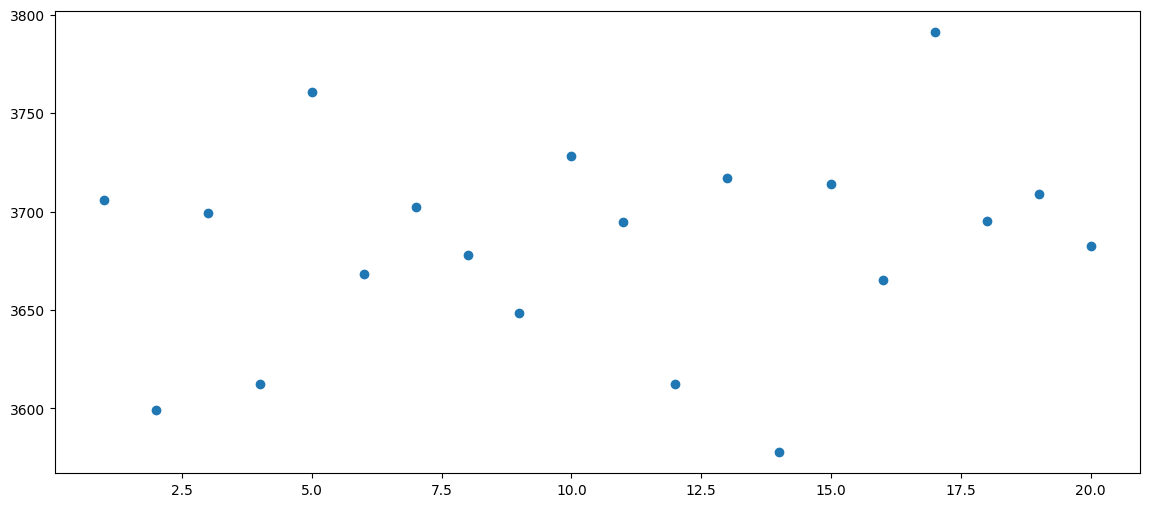

count      20.000000
mean     3683.089077
std        53.259832
min      3577.707839
25%      3661.056398
50%      3694.904597
75%      3710.188974
max      3791.081083
Name: PASTA, dtype: float64

In [264]:
total_purchase_by_time = df.groupby(["TIME"])["PASTA"].sum()

fig, ax = plt.subplots(figsize = (14, 6))
ax.scatter(total_purchase_by_time.index, total_purchase_by_time.values)
plt.show()

total_purchase_by_time.describe()